# Final Project Macine Learning
## Kelompok 1
>Anggota Kelompok:
* Nama (NIM)
* Nama (NIM)
* Nama (NIM)
* Nama (NIM)

#Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

# Import Dataset From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/JokiDs/dairy_dataset.csv')

In [ ]:
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


# Exploratory Data Analysis

In [ ]:
#Membaca dimensi data (baris x kolom)
df.shape

(4325, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

# Data Cleaning and Preprocessing

In [ ]:
#Mengecek ada/tidaknya nilai yang kosong
df[df.isnull().any(axis=1)]

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)


In [ ]:
#Mengubah nama kolom pada dataframe
df.rename(columns = {'Farm Size':'FarmSize'}, inplace = True)
df.rename(columns = {'Product Name':'ProductName'}, inplace = True)
df.rename(columns = {'Customer Location':'CustomerLocation'}, inplace = True)
df.rename(columns = {'Sales Channel':'SalesChannel'}, inplace = True)
df.rename(columns = {'Storage Condition':'StorageCondition'}, inplace = True)

In [ ]:
#Mengubah data kategorikal menjadi data numerikal
df['Location']=pd.factorize(df.Location)[0]
df['ProductName']=pd.factorize(df.ProductName)[0]
df['Brand']=pd.factorize(df.Brand)[0]
df['StorageCondition']=pd.factorize(df.StorageCondition)[0]
df['CustomerLocation']=pd.factorize(df.CustomerLocation)[0]
df['SalesChannel']=pd.factorize(df.SalesChannel)[0]
df['FarmSize']=pd.factorize(df.FarmSize)[0]

In [ ]:
df.head()

,Location,Total Land Area (acres),Number of Cows,FarmSize,Date,Product ID,ProductName,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),CustomerLocation,SalesChannel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,0,310.84,96,0,2022-02-17,5,0,0,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,0,0,215,19.55,64.03
1,1,19.19,44,1,2021-12-01,1,1,1,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,1,0,129,43.17,181.10
2,2,581.69,24,0,2022-02-28,4,2,0,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,0,1,247,15.10,140.83
3,0,908.00,89,2,2019-06-09,3,3,2,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,2,1,222,74.50,57.68
4,3,861.95,21,0,2020-12-14,8,4,3,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,3,2,2,76.02,33.40


In [ ]:
#Menghilangkan kolom yang tidak digunakan
df = df.drop('Date',axis=1)
df = df.drop('Product ID',axis=1)
df = df.drop('Production Date',axis=1)
df = df.drop('Expiration Date',axis=1)

In [ ]:
df.head()

,Location,Total Land Area (acres),Number of Cows,FarmSize,ProductName,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),StorageCondition,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),CustomerLocation,SalesChannel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,0,310.84,96,0,0,0,222.40,85.72,19064.1280,25,0,7,82.24,575.68,0,0,215,19.55,64.03
1,1,19.19,44,1,1,1,687.48,42.61,29293.5228,22,1,558,39.24,21895.92,1,0,129,43.17,181.10
2,2,581.69,24,0,2,0,503.48,36.50,18377.0200,30,2,256,33.81,8655.36,0,1,247,15.10,140.83
3,0,908.00,89,2,3,2,823.36,26.52,21835.5072,72,0,601,28.92,17380.92,2,1,222,74.50,57.68
4,3,861.95,21,0,4,3,147.77,83.85,12390.5145,11,2,145,83.07,12045.15,3,2,2,76.02,33.40


# Multiple Linear Regression Model

In [ ]:
X = df.drop(columns=['Approx. Total Revenue(INR)','Price per Unit (sold)','Quantity Sold (liters/kg)'])
y = df['Approx. Total Revenue(INR)']

## Split Data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create Model and Training

In [ ]:
lr= LinearRegression()

In [ ]:
#Train Model
lr.fit(X_train, y_train)

LinearRegression()

## Predict

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([-2.07752567e+03,  9.40320722e+03,  1.23863708e+03,  8.24073475e+03,
        6.11673332e+03, -4.84277730e+02,  2.45304446e+04,  6.75421064e+03,
        2.10065656e+04,  5.85791153e+03,  8.86292479e+03, -2.58587628e+02,
        4.74088375e+03,  2.25203134e+04,  1.80069012e+04,  2.00937117e+04,
        2.62378672e+04,  1.90739440e+04,  5.33849446e+03,  5.01522668e+03,
        3.50264165e+03,  9.78507031e+03,  2.80827364e+03,  4.12211746e+04,
        4.76401423e+03,  4.32913517e+03,  5.81441331e+03,  1.55042506e+04,
        9.11429740e+03,  1.65118424e+04,  3.06787705e+04,  9.15284452e+03,
        1.20029631e+04,  2.44558395e+04,  3.15088439e+03, -4.81896329e+03,
        4.47003567e+03,  3.98776488e+04,  3.17701343e+03,  3.61397796e+04,
        3.96577651e+04,  8.10003560e+02,  2.94092048e+04,  3.43805150e+04,
       -2.31200230e+03,  1.68202809e+04,  1.88016956e+04,  1.67222548e+04,
        2.37302860e+04,  2.72728523e+04,  5.35545241e+03,  3.97554101e+01,
        1.12749571e+04,  

## Model Evaluation

In [ ]:
r2=r2_score(y_test, y_pred)
r2

0.9042193412699489

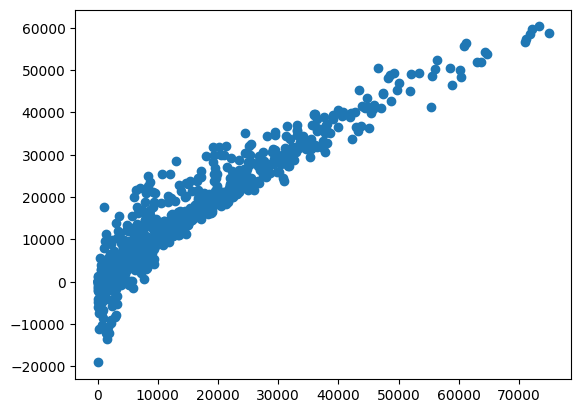

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

In [ ]:
#Menampilkan nilai intercept
print('intercept:', lr.intercept_)

intercept: -46.76306268894041


In [ ]:
def print_evaluate(true, predicted):

  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true,predicted)
  print('MAE:', mae)
  print('MSE:', mse)
  print('RMSE:', rmse)
  print('R2 Square:', r2_square)
  print('__________________________________')

In [ ]:
import numpy as np
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square
Y_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)
print_evaluate(y_test, Y_pred)
print_evaluate(y_train, train_pred)

MAE: 2848.3067719454893
MSE: 19350042.443880614
RMSE: 4398.868313996296
R2 Square: 0.9042193412699489
__________________________________
MAE: 2913.6059949126607
MSE: 19861525.713170264
RMSE: 4456.627167844565
R2 Square: 0.9082618705634297
__________________________________


In [ ]:
results = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, Y_pred)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results


,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2848.306772,1.935004e+07,4398.868314,0.904219
